In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csv_path = "../data/processed/h358-2015.csv"

In [5]:
df = pd.read_csv(csv_path, index_col=0)
print(df.shape)
df.head()

(22498, 15)


,POWER_5,POWER_6,CONTACT_7,CONTACT_8,CONTACT_9,POWER_10,POWER_12,CONTACT_13,OCCUPANCY_14,ILLUMINANCE_15,TEMPERATURE_16,POWER_17,TEMPERATURE_18,POWER_22,ILLUMINANCE_23
2015-02-10 12:30:00,0.0,16.0,0.0,0.500000,0.0,12.0,20.000000,0.0,1.0,102.741818,34.665,7.000000,19.76,0.0,72.0
2015-02-10 13:00:00,0.0,16.0,0.0,0.666667,0.0,12.0,0.000000,0.0,1.0,89.760000,34.200,35.631579,19.61,0.0,68.0
2015-02-10 15:30:00,0.0,16.0,0.0,0.000000,0.0,12.0,26.460317,0.0,1.0,33.660000,32.705,34.809524,20.16,0.0,42.0
2015-02-10 16:00:00,0.0,16.0,0.0,0.500000,0.0,12.0,23.250000,0.0,0.0,21.420000,33.100,34.214286,20.24,0.0,36.0
2015-02-10 16:30:00,0.0,16.0,0.0,0.500000,0.0,12.0,0.000000,0.0,1.0,43.656000,33.490,33.913043,20.08,0.0,64.8


In [7]:
df.describe()

,POWER_5,POWER_6,CONTACT_7,CONTACT_8,CONTACT_9,POWER_10,POWER_12,CONTACT_13,OCCUPANCY_14,ILLUMINANCE_15,TEMPERATURE_16,POWER_17,TEMPERATURE_18,POWER_22,ILLUMINANCE_23
count,22498.000000,22498.000000,22498.0,22498.000000,22498.000000,22498.000000,2.249800e+04,22498.0,22498.000000,22498.000000,22498.000000,22498.000000,22498.000000,2.249800e+04,22498.000000
mean,16.696981,111.486609,0.0,0.131958,0.116099,24.371912,5.061273e+01,0.0,0.245088,50.457677,24.852312,27.907712,22.698455,1.089554e+02,58.310950
std,212.416635,1519.019399,0.0,0.275327,0.313287,21.210422,7.072725e+03,0.0,0.430149,92.608712,4.163431,203.268614,3.808613,1.409034e+04,81.772519
min,0.000000,15.000000,0.0,0.000000,0.000000,3.375000,0.000000e+00,0.0,0.000000,0.000000,13.800000,0.000000,13.880000,0.000000e+00,24.000000
25%,0.000000,44.000000,0.0,0.000000,0.000000,13.000000,0.000000e+00,0.0,0.000000,0.000000,21.800000,0.000000,19.840000,0.000000e+00,24.000000
50%,0.000000,68.000000,0.0,0.000000,0.000000,16.000000,0.000000e+00,0.0,0.000000,6.120000,24.310000,0.000000,22.120000,0.000000e+00,30.000000
75%,18.000000,95.022101,0.0,0.000000,0.000000,28.000000,0.000000e+00,0.0,0.000000,64.181538,27.760000,0.000000,25.880000,0.000000e+00,60.000000
max,22817.000000,226758.702703,0.0,1.000000,1.000000,1552.840909,1.060864e+06,0.0,1.000000,520.200000,39.765000,1917.000000,33.250000,2.097152e+06,1020.000000


Target column (occupancy)

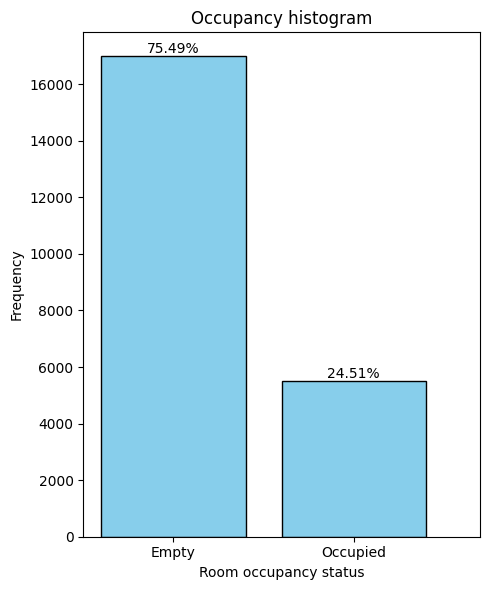

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))

# Plot histogram of target variable
plt.hist(df["OCCUPANCY_14"], bins=2, color='skyblue', edgecolor='black', width=0.4)
plt.xlabel("Room occupancy status")
plt.ylabel("Frequency")
plt.title("Occupancy histogram")

# Calculate percentages
total_count = len(df["OCCUPANCY_14"])
counts = df["OCCUPANCY_14"].value_counts()
percentages = [f'{count / total_count * 100:.2f}%' for count in counts]

# Add percentages on top of the bars
position_offeset = [0.2, -0.3]  # Offset for text position
for i, count in enumerate(counts):
    plt.text(i+position_offeset[i], count, percentages[i], ha='center', va='bottom', fontsize=10)

plt.xticks(ticks=[0.2, 0.7], labels=['Empty', 'Occupied']) 
plt.tight_layout()
plt.show()
